In [4]:
import pandas as pd
%matplotlib inline  
 #force to plot in jupyter
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("C:/Users/Anmol/Desktop/data science/PlantGrowth.csv")
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [8]:
pd.unique(data.group)

array(['ctrl', 'trt1', 'trt2'], dtype=object)

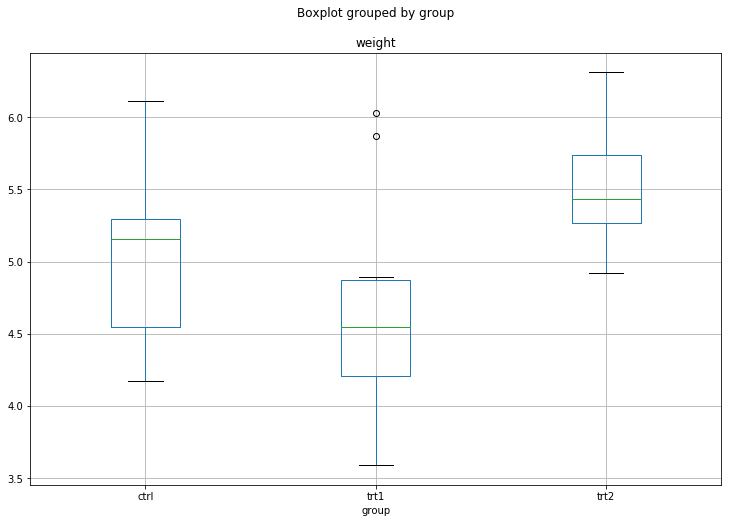

In [10]:
data.boxplot('weight',by='group',figsize=(12,8))

In [11]:
grps=pd.unique(data.group.values)
d_data={i:data['weight'][data.group==i]for i in grps}

In [12]:
d_data


{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [13]:
d_data1=np.array(d_data)

In [14]:
d_data1

array({'ctrl': 0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64, 'trt1': 10    4.81
11    4.17
12    4.41
13    3.59
14    5.87
15    3.83
16    6.03
17    4.89
18    4.32
19    4.69
Name: weight, dtype: float64, 'trt2': 20    6.31
21    5.12
22    5.54
23    5.50
24    5.37
25    5.29
26    4.92
27    6.15
28    5.80
29    5.26
Name: weight, dtype: float64}, dtype=object)

In [21]:
from scipy import stats
F,p=stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
print("F value:",F)
print("P value:",p)

F value: 4.846087862380136
P value: 0.0159099583256229


# Two way anova

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

In [6]:
datafile=pd.read_csv("C:/Users/Anmol/Desktop/data science/ToothGrowth.csv")

In [7]:
datafile.shape

(60, 4)

In [9]:
datafile.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [11]:
pd.unique(datafile.supp)

array(['VC', 'OJ'], dtype=object)

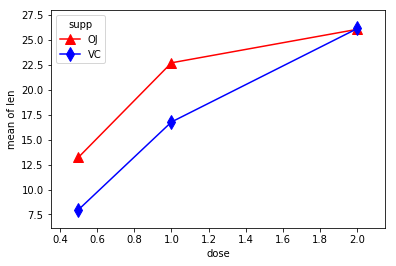

In [14]:
fig=interaction_plot(datafile.dose,datafile.supp,datafile.len,colors=['red','blue'],markers=['^','d'],ms=10)

# Degree of freedom

In [23]:
N=len(datafile.len)
df_a=len(datafile.supp.unique())-1
df_b=len(datafile.dose.unique())-1
df_axb=df_a*df_b
df_w=N-(len(datafile.supp.unique())*len(datafile.dose.unique()))
df_w

54

In [26]:
grand_mean=datafile['len'].mean()
ssq_a=sum([(datafile[datafile.supp==i].len.mean()-grand_mean)**2 for i in datafile.supp])
ssq_b=sum([(datafile[datafile.dose==i].len.mean()-grand_mean)**2 for i in datafile.dose])
ssq_t=sum((datafile.len-grand_mean)**2)
vc=datafile[datafile.supp=='VC']
oj=datafile[datafile.supp=='oj']
vc_dose_means=[vc[vc.dose==i].len.mean() for i in vc.dose]
oj_dose_means=[oj[oj.dose==i].len.mean() for i in vc.dose]
ssq_w=sum((oj.len-oj_dose_means)**2)+sum((vc.len-vc_dose_means)**2)
ssq_axb=ssq_t-ssq_a-ssq_b-ssq_w

ValueError: operands could not be broadcast together with shapes (0,) (30,) 

In [27]:
ms_a=ssq_a/df_a
ms_b=ssq_b/df_b
ms_axb=ssq_axb/df_axb
ms_w=ssq_w/df_w

NameError: name 'ssq_axb' is not defined

# F-ratio


In [28]:
f_a=ms_a/ms_w
f_b=ms_b/ms_w
f_axb=msaxb/ms_w

NameError: name 'ms_w' is not defined

# P-values

In [29]:
p_a=stats.f.sf(f_a,df_a,df_w)
p_b=stats.f.sf(f_b,df_b,df_w)
p_axb=stats.f.sf(f_axb,df_axb,df_w)

NameError: name 'f_a' is not defined

In [30]:
results={'Sum_sq':[ssq_a,ssq_b,ssq_axb,ssq_w],
         'df':[df_a,df_b,df_axb,df_w],
         'F':[f_a,f_b,f_axb,'NaN'],
         'PR(>F)':[p_a,p_b,P_axb,'NAN']}
columns=['Sum_sq','df','F','PR(>F)']
aov_table=pd.DataFrame(results,columns=columns,
                      index=['supp','Dose','Supp:Dose','Residual'])
aov_table


NameError: name 'ssq_axb' is not defined